In [1]:
include("load_save.jl")
dataset_name = String(split(split(@__FILE__, '\\')[end], '.')[1])
R, X, Y, L, MF, SF, Y, PY = load_small_dataset(dataset_name);

Dataset : eqFP578s_C


Sample : 51
Variable : 336


In [2]:
using Pandas, Seaborn

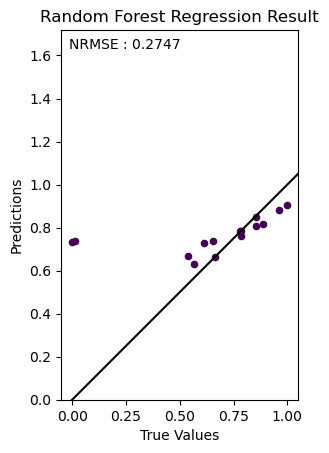

NRMSE : 0.274671


In [3]:
view_result(PY, Y, data_state);

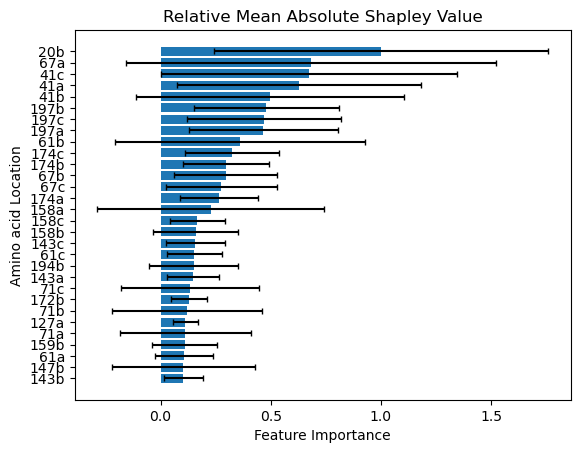

In [4]:
view_importance(R, L, MF, SF, show_number=30);

In [5]:
tag = Vector{String}()
NL = Vector{String}()
for l in L
    nl = parse(Int, l[1:end-1])
    if nl ∈ [39, 41, 60, 61, 62, 66, 67, 90, 92, 106, 108, 141, 143, 145, 158, 160, 174, 197, 199, 213, 215]
        push!(tag, "Interacting\nchromophores site")
        push!(NL, "*" * l)
    else
        push!(tag, "Remains")
        push!(NL, l)
    end
end
data = Pandas.DataFrame(Dict("Feature Importance" => MF, "AA type" => tag));

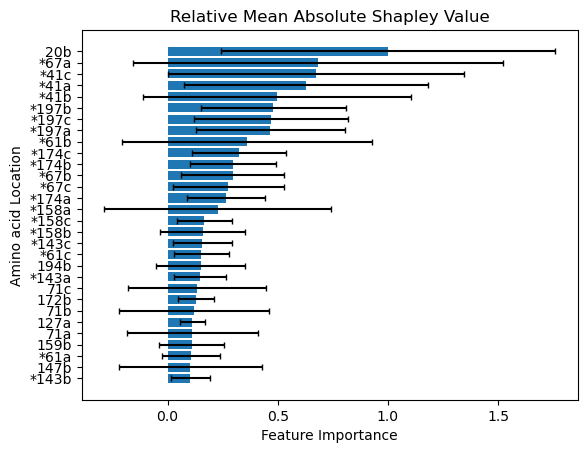

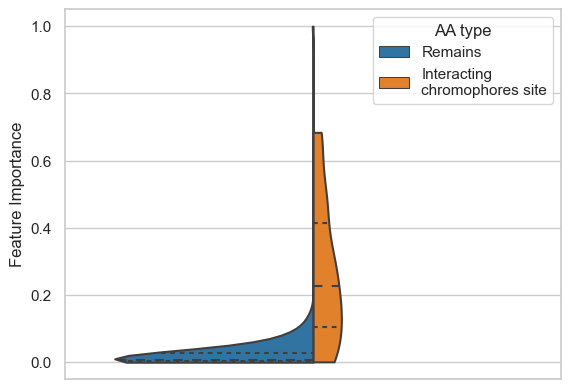

In [6]:
view_importance(R, NL, MF, SF, show_number=30)
data["all"] = ""
set_theme(style="whitegrid", palette="tab10")
violinplot(x="all", y="Feature Importance", hue="AA type", inner="quartile", data=data, split=true, bw=0.4, cut=0)
xlabel("")
display(gcf())
close("all")
matplotlib.rc_file_defaults()